### MNIST hand-written digits detection with CNN

To detect hand-written digits with Convolutional Neural Networks, let's use the `keras` library to build a model with a few alternating Convolution (`Conv2D`) and MaxPooling (`MaxPooling2D`) layers.  

Note that the first argument to `Conv2D` and `MaxPooling2D` functions is the number of `filters` used and the second one is the `kernel_size`, which is 3x3 for convolution and 2x2 for MaxPooling.  

The activation function of each layer is `relu` (rectified linear unit) and the initial `input_shape` is the 28x28x1 tensor representing the 28x28 pixel images with 1 grayscale channel.

In [35]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

CNN models always end with `Dense` layers.  The final layer has 10 inputs with the `softmax` actionvation function, which will convert the output to an array of probabilities.  The array index corresponding to the value with the highest probability will indicate the digit predicted by the model. 

In [2]:
# add fully-connected layers at the end of the model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
from keras.datasets import mnist
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# compile and train the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1692 - accuracy: 0.9473
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0242 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0191 - accuracy: 0.9941


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0329 - accuracy: 0.9888


In [7]:
print(test_acc)

0.9915000200271606


In [7]:
# (optional) save model to .h5 file:
model.save('test/mnist-digits-cnn-model.h5')

In [32]:
# (optional) load model from .h5 file:
model = models.load_model('test/mnist-digits-cnn-model.h5')

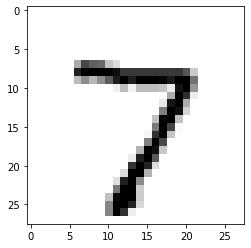

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# display one of the digits from test_images array:
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [34]:
X = digit.reshape(1,28,28,1)
y = model.predict(X)
y_rounded = [ round(elem, 2) for elem in y[0] ]

print('prediction:', y_rounded)
print('predicted digit:', np.argmax(y))

prediction: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
predicted digit: 7
